<a href="https://colab.research.google.com/github/thatcathatechat/digital-image-processing-course/blob/main/DIP_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Objective**
1. Take a Lena image and convert it into grayscale. Create 10 noisy versions of the Lena image by adding additive Gaussian noise with the original image. Take the average of noisy images and display the same. Report the observation made.

Note:  Write the user defined function for image averaging (problem 1)

In [1]:
import numpy as np
import os
import cv2
import random
from datetime import datetime
from google.colab.patches import cv2_imshow
# download image
!wget https://raw.githubusercontent.com/thatcathatechat/digital-image-processing-course/main/media/Lena.png

--2022-02-01 14:47:09--  https://raw.githubusercontent.com/thatcathatechat/digital-image-processing-course/main/media/Lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lena.png’

Lena.png            100%[===================>] 462.73K  --.-KB/s    in 0.04s   

2022-02-01 14:47:09 (12.4 MB/s) - ‘Lena.png’ saved [473831/473831]



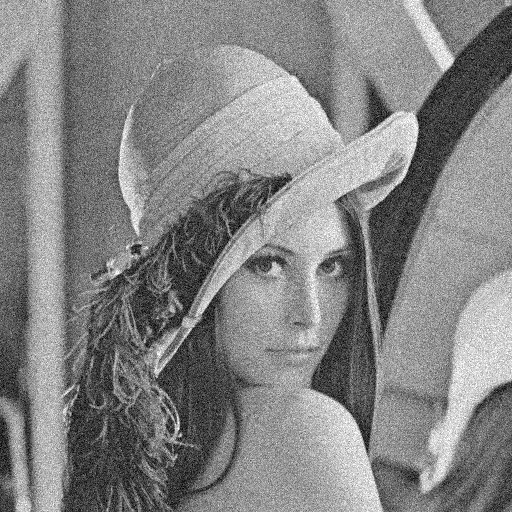

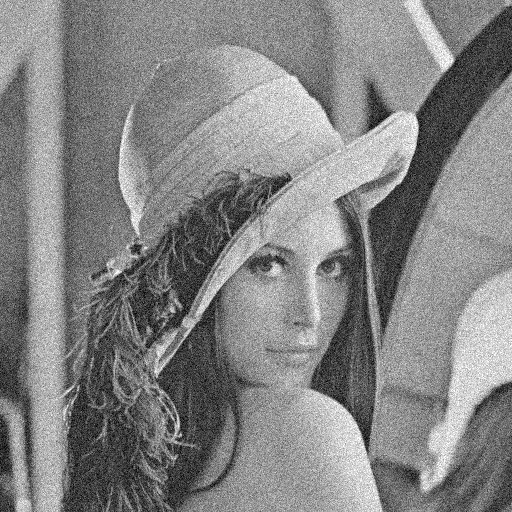

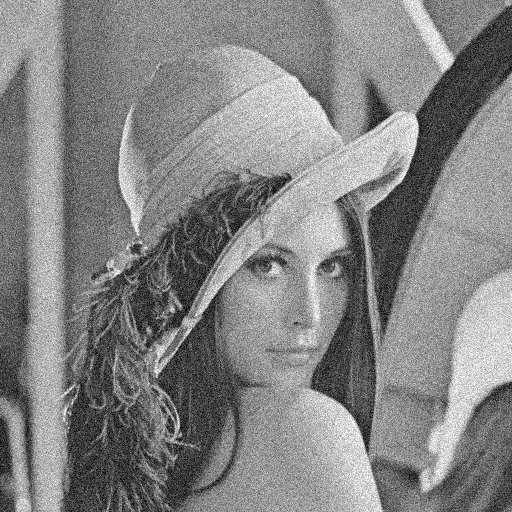

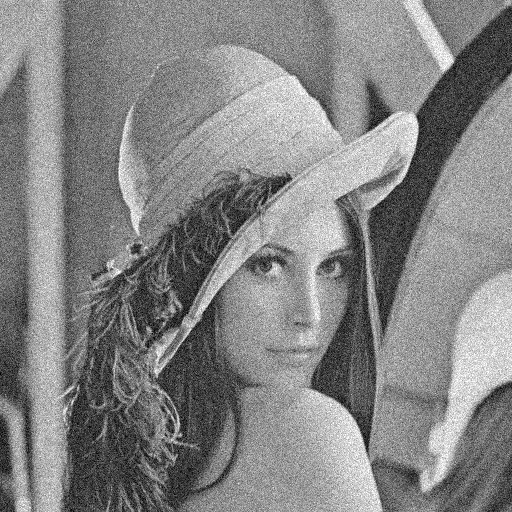

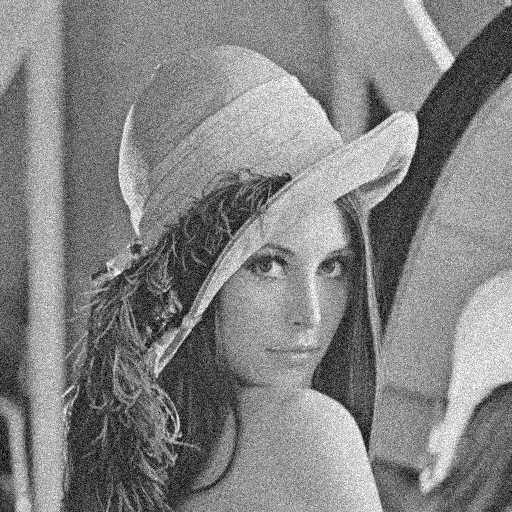

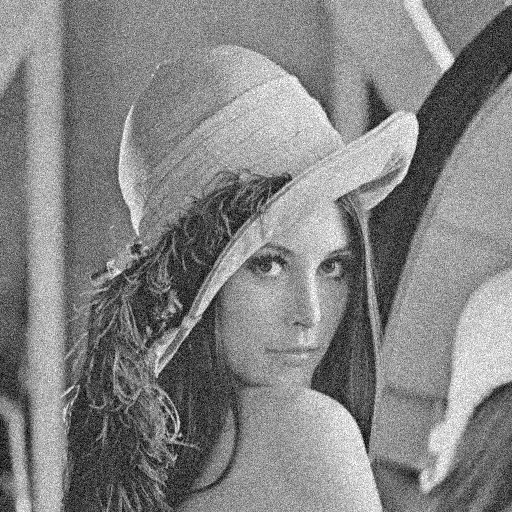

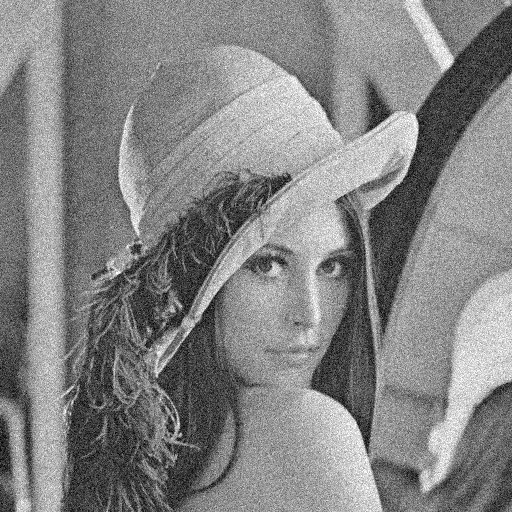

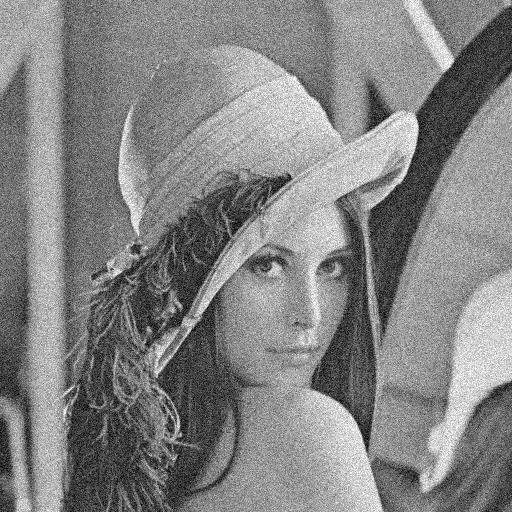

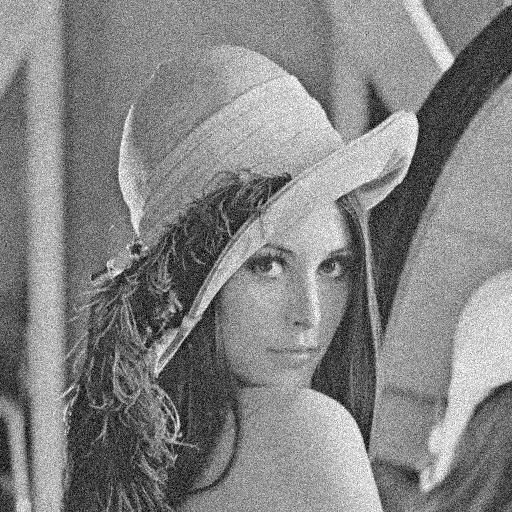

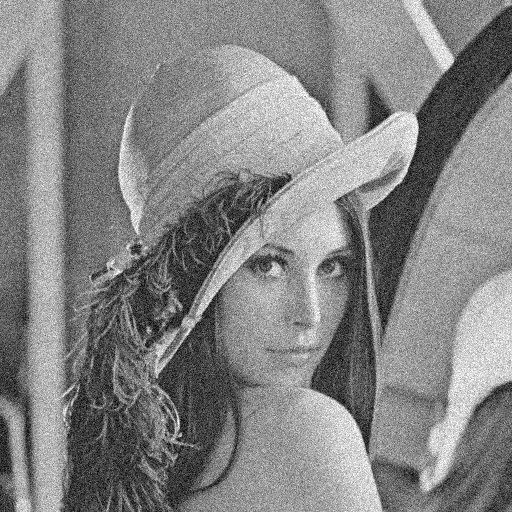

In [2]:
def create_noisy_image(image,mean,stdv):
  """
  Function to add gaussian noise to image with given mean and standard deviation
  """
  noise = np.random.normal(mean, stdv, image.shape)
  new_image = image + noise
  return new_image


image_list=[]
image = cv2.imread('Lena.png',0)
for i in range (0,10):
  image_temp=create_noisy_image(image,0,20)
  image_list.append(image_temp)

for i in range(0,10):
  cv2_imshow(image_list[i])


In [3]:
def avg_image(image_list):
  """
  Returns the average image of the given image list
  Make sure all the images have same shape
  """
  new_img = np.zeros(image_list[0].shape)
  n = len(image_list)
  h = new_img.shape[0]
  w = new_img.shape[1]
  for i in range(h):
    for j in range(w):
      temp = 0
      for k in range(n):
        temp += image_list[k][i][j]
      temp = temp / n
      temp = int(temp)
      if temp > 255:
        temp = 255
      new_img[i][j] = temp
  return new_img

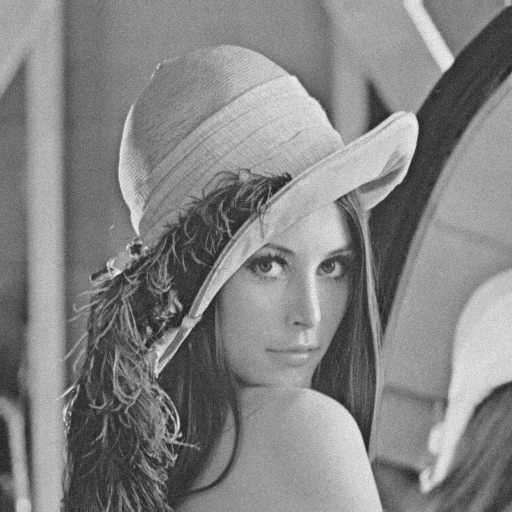

In [4]:
final_image= avg_image(image_list)
cv2_imshow(final_image)

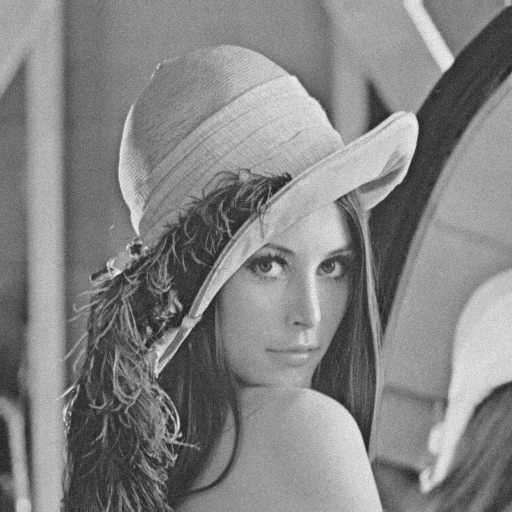

In [5]:
our_output = avg_image(image_list)
meanByNP = np.mean(image_list,axis=0).astype(np.uint8)
cv2_imshow(our_output)

In [6]:
# Check if our implementation is same as numpys
np.array_equal(our_output,meanByNP)

True

# Problem 2
Take a Lena image and scale it by factors of 1,2,0.5 using bilinear and nearest neighbor interpolation methods. Display the scaled images. Also, display the output of built-in functions for doing scaling by factors of 0.5,1 and 2. Compare the results.


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from google.colab.patches import cv2_imshow

In [8]:

# writing Nearest Neighbour Interpolation Code

def findDist(p1,p2):
  x1 = p1[0]
  y1 = p1[1]
  x2 = p2[0]
  y2 = p2[1]
  return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def find_nn(x,y):
  lst = [[np.floor(x),np.floor(y)],[np.ceil(x),np.floor(y)],[np.ceil(x),np.ceil(y)],[np.floor(x),np.ceil(y)]]
  ref = [x,y]
  dists = [findDist(lst[i],ref) for i in range(4)]
  index_min = np.argmin(dists)
  return lst[index_min]

def NN_Scale(image,scale):
  """
  For greyscale image only
  retuens input image scaled with factor of scale using nearest neighbour interpolation
  """
  h = image.shape[0]
  w = image.shape[1]

  new_h = int(h*scale)
  new_w = int(w*scale)
  new_image = np.zeros((new_h,new_w))
  for i in range(new_h):
    for j in range(new_h):
      x = float(i) / scale
      y = float(j) / scale
      nn_index = find_nn(x,y)
      fin_x = min(int(nn_index[0]),h - 1)
      fin_y = min(int(nn_index[1]),w - 1)
      new_image[i][j] = image[fin_x][fin_y]
  return new_image




In [9]:

def Bilinear_Scaling(img,scale):
  """
  Returns Scaled version of input image using bilinear interpolation
  """
  h = img.shape[0]
  w = img.shape[1]

  new_h = int(h * scale)
  new_w = int(w * scale)

  new_image = np.zeros((new_h,new_h))

  for i in range(new_h):
    for j in range(new_w):
      x = float(i) / scale
      y = float(j) / scale
      xl, yl, xh, yh = int(np.floor(x)), int(np.floor(y)), int(min(np.ceil(x),h - 1)), int(min(np.ceil(y),w - 1))
      
      x_diff = x - float(xl)
      y_diff = y - float(yl)

      a = img[xl][yl]
      b = img[xl][yh]
      c = img[xh][yl]
      d = img[xh][yh]

      pixel_val = a*(1 - x_diff)*(1 - y_diff) + b*(1-x_diff)*y_diff + c*(x_diff)*(1-y_diff) + d*(x_diff*y_diff)

      new_image[i][j] = int(pixel_val)
  
  return new_image.astype(int)


# NN Interpolation


In [10]:
g_image = cv2.imread('Lena.png',0)
# g_image = cv2.resize(g_image,None,fx=0.5,fy=0.5) # uncomment only to compare results when image is small

In [11]:
nearest_half = NN_Scale(g_image,0.5)
nearest_1 = NN_Scale(g_image,1)
nearest_2 = NN_Scale(g_image,2)

In [12]:

inbuilt_nn_half = cv2.resize(g_image,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_NEAREST)
inbuilt_nn_1 = cv2.resize(g_image,None,fx=1,fy=1,interpolation=cv2.INTER_NEAREST)
inbuilt_nn_2 = cv2.resize(g_image,None,fx=2,fy=2,interpolation=cv2.INTER_NEAREST)


In [13]:
compare_0 = np.hstack((nearest_half,inbuilt_nn_half))
compare_1 = np.hstack((nearest_1,inbuilt_nn_1))
compare_2 = np.hstack((nearest_2,inbuilt_nn_2))

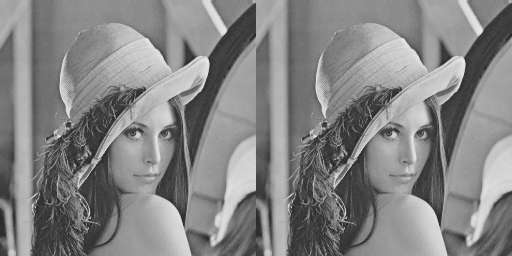

In [14]:
cv2_imshow(compare_0)

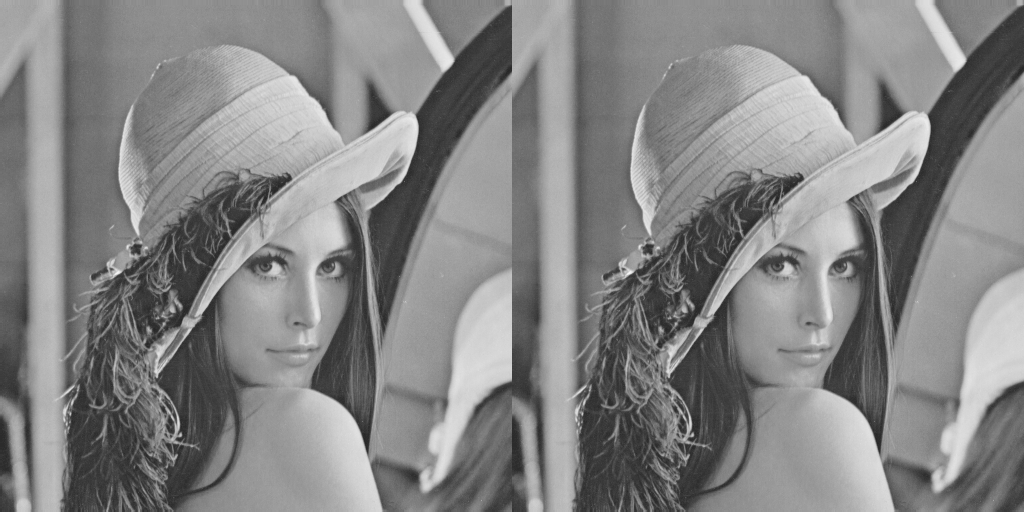

In [15]:
cv2_imshow(compare_1)

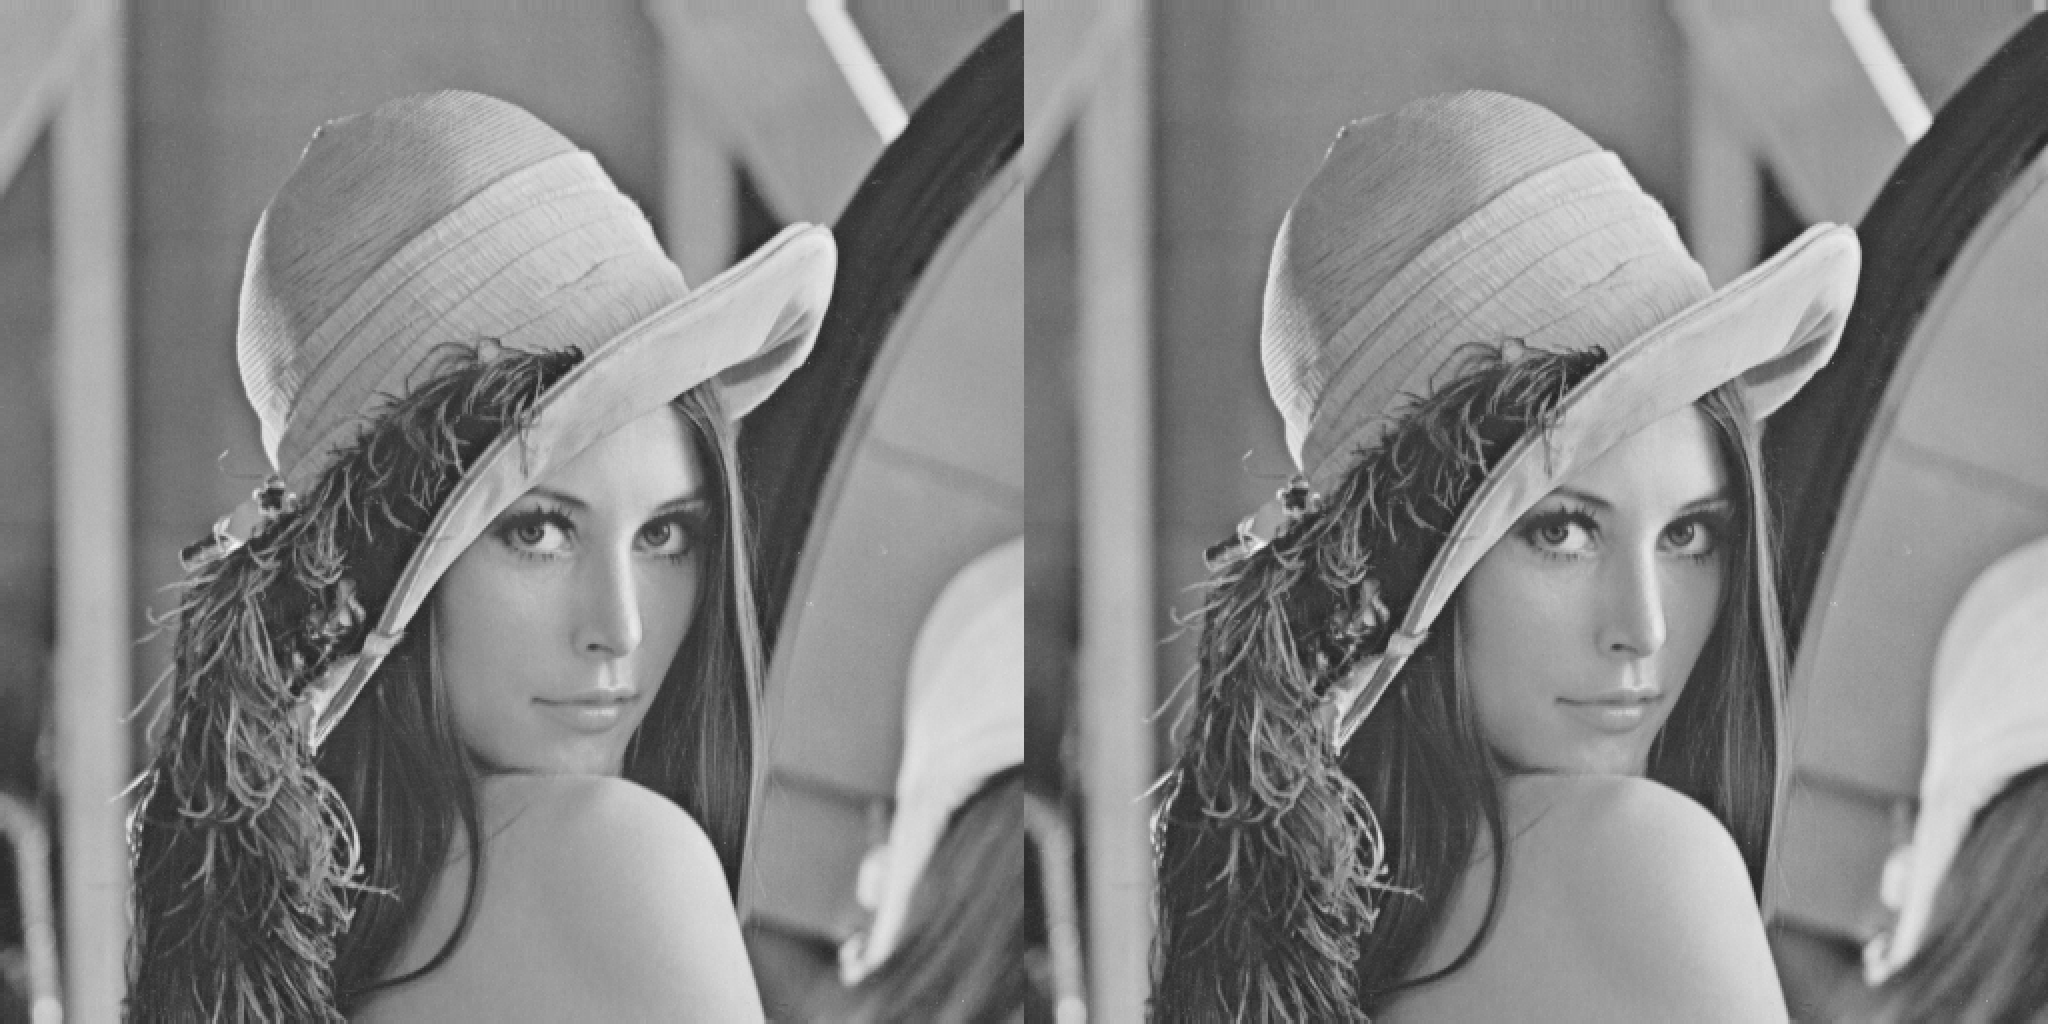

In [16]:
cv2_imshow(compare_2)

In [17]:
# Check if our implementation of nn interpolation gives same output as cv2s
print(np.array_equal(nearest_half,inbuilt_nn_half))
print(np.array_equal(nearest_1,inbuilt_nn_1))
print(np.array_equal(nearest_2,inbuilt_nn_2))

True
True
True


## Bilinear Interpolation Scaling


In [18]:
bilinear_half = Bilinear_Scaling(g_image,0.5)
bilinear_1 = Bilinear_Scaling(g_image,1)
bilinear_2 = Bilinear_Scaling(g_image,2)

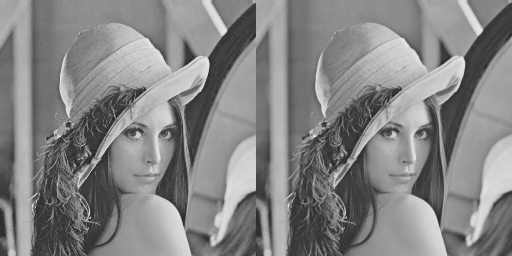

In [19]:
inbuilt_bi_half = cv2.resize(g_image,None,fx = 0.5,fy =0.5,interpolation=cv2.INTER_LINEAR)
compare = np.hstack((bilinear_half,inbuilt_bi_half))
cv2_imshow(compare)

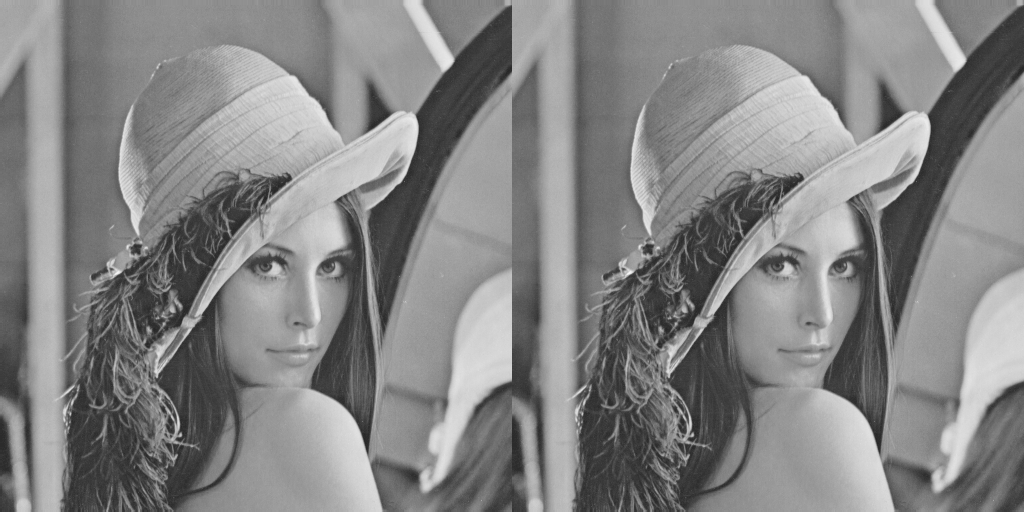

In [20]:
inbuilt_bi_1 = cv2.resize(g_image,None,fx = 1,fy =1,interpolation=cv2.INTER_LINEAR)
compare1 = np.hstack((bilinear_1,inbuilt_bi_1))
cv2_imshow(compare1)

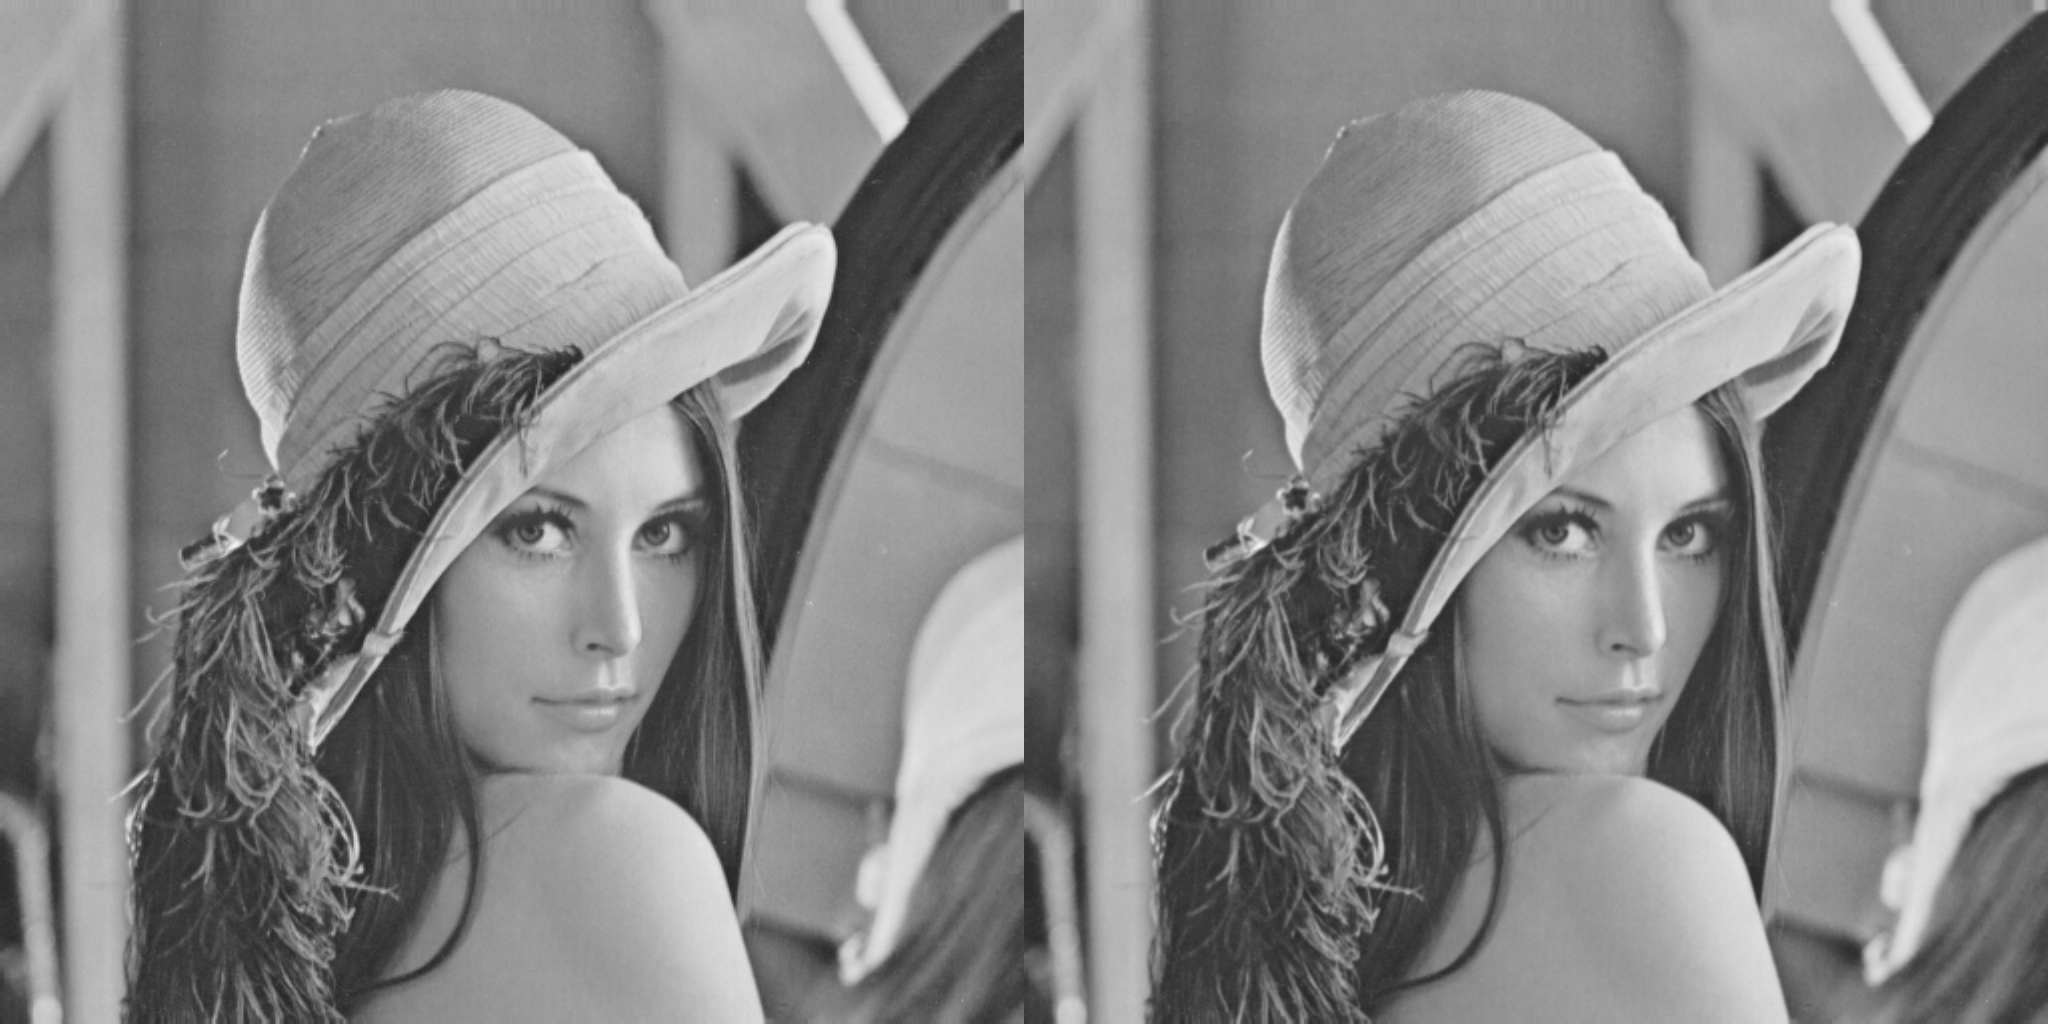

In [21]:
inbuilt_bi_2 = cv2.resize(g_image,None,fx = 2,fy =2,interpolation=cv2.INTER_LINEAR)
compare2 = np.hstack((bilinear_2,inbuilt_bi_2))
cv2_imshow(compare2)

In [22]:
# Check if our implementation of nn interpolation gives exact same output as cv2s
print(np.array_equal(bilinear_half,inbuilt_bi_half))
print(np.array_equal(bilinear_1,inbuilt_bi_1))
print(np.array_equal(bilinear_2,inbuilt_bi_2))

False
True
False
